In [48]:
from sklearn.cluster import KMeans

In [49]:
import numpy as np 
import pandas as pd 

In [50]:
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('Mall_Customers.csv')

In [52]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pre-Processing the dataset

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [55]:
df.shape

(200, 5)

In [56]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
df = df.drop(columns=['CustomerID'], axis=1)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


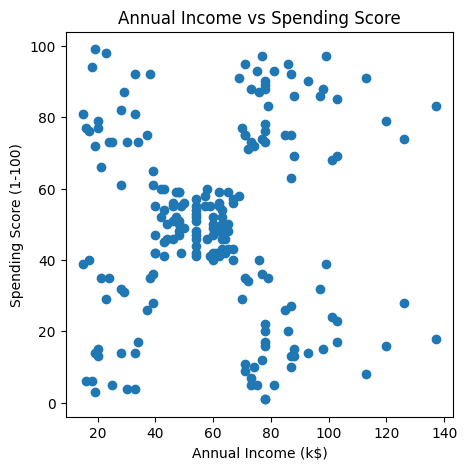

In [59]:
plt.figure(figsize=(5, 5))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Annual Income vs Spending Score')
plt.show()

In [61]:
# Lets take annual income and spending score as features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

In [62]:
clustering_Scores = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='random', random_state=42)
    kmeans.fit(X)
    clustering_Scores.append(kmeans.inertia_)


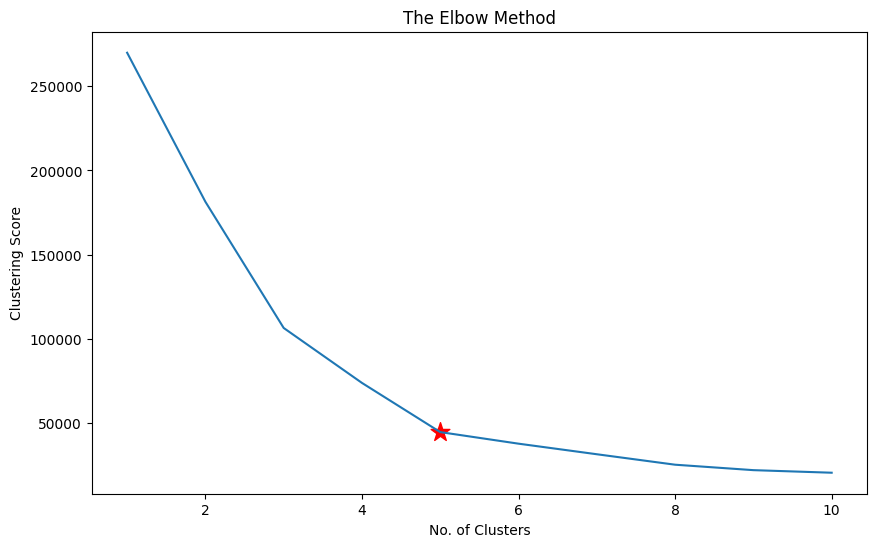

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_Scores)
plt.scatter(5,clustering_Scores[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
kmeans.fit(X)

pred = kmeans.predict(X)
pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [66]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852]])

In [70]:
df['Cluster'] = pd.DataFrame(pred, columns=['Cluster']) 
print("Number of customers in each cluster:")
df.groupby('Cluster').size()

Number of customers in each cluster:


Cluster
0    23
1    22
2    35
3    39
4    81
dtype: int64

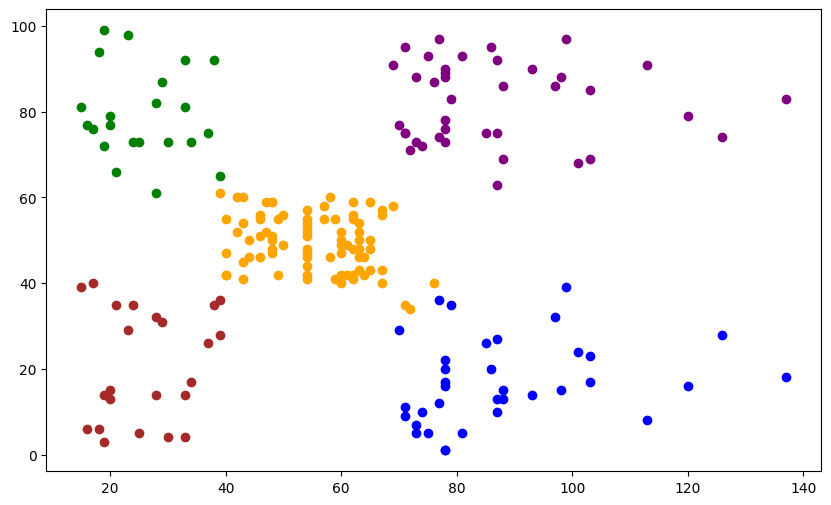

In [71]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

Text(0.5, 1.0, 'Customer Clusters')

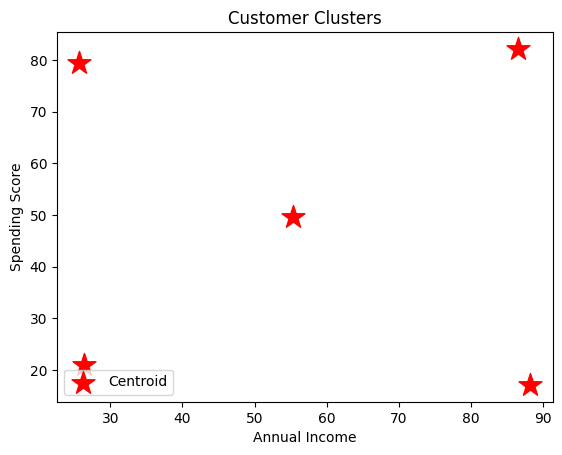

In [72]:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

Text(0.5, 1.0, 'Customer Clusters')

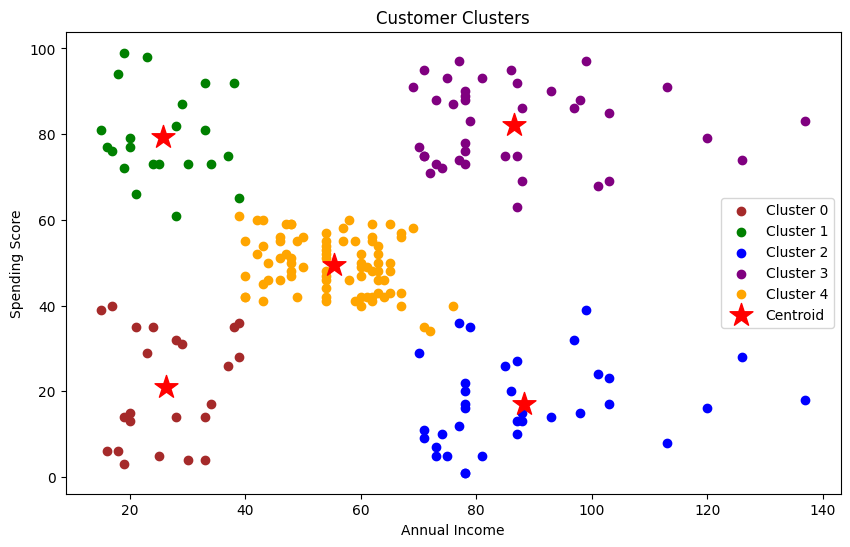

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Customer Clusters')

In [74]:
def plot_k_means_progress(centroid_history, n_clusters, centroid_sets, cluster_color):
    """
    Plots the progression of K-Means clustering over iterations.
    """
    plt.figure(figsize=(10,6))
    for j in range(n_clusters):
        plt.plot(centroid_history[j::n_clusters, 0], centroid_history[j::n_clusters, 1], 
                 marker='o', linestyle='-', color=cluster_color[f'c_{j}'])

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.title('Centroid Movement Across Iterations')
    plt.legend([f'Cluster {i} Path' for i in range(n_clusters)])
    plt.show()

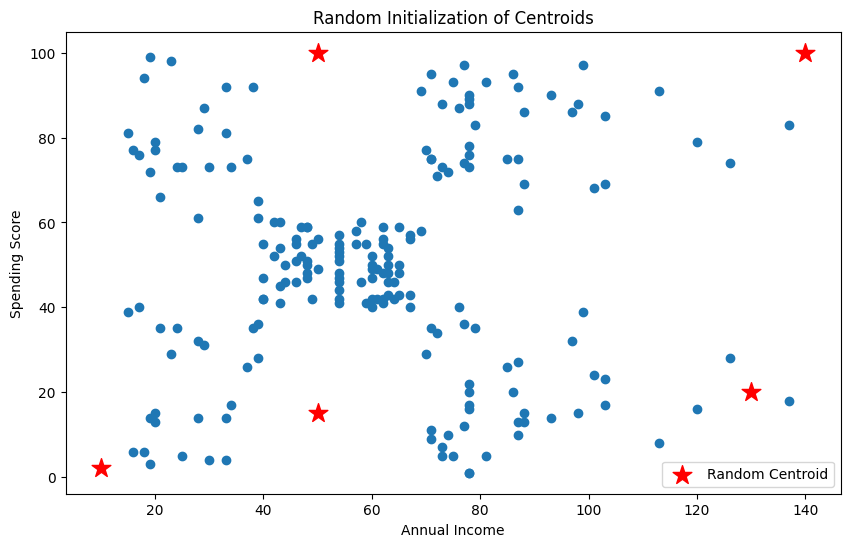

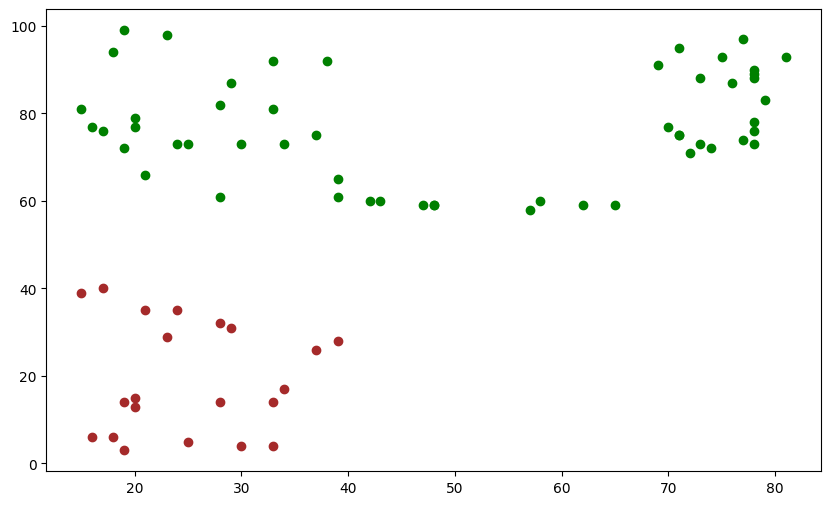

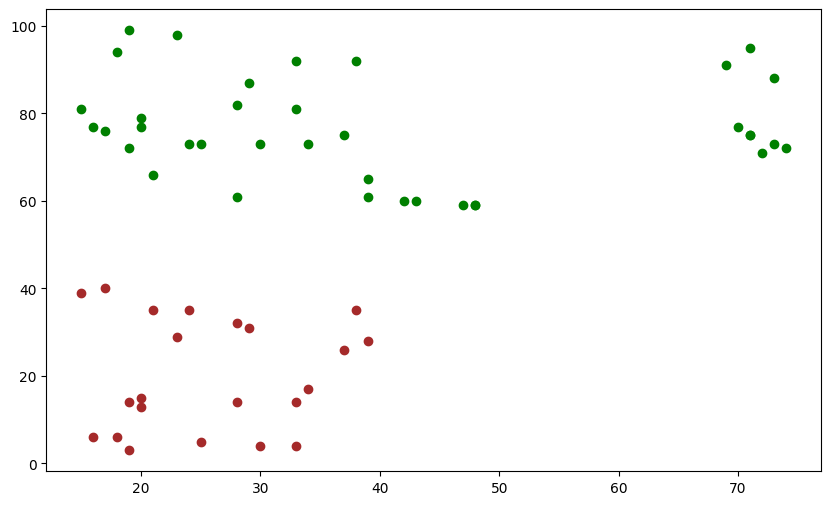

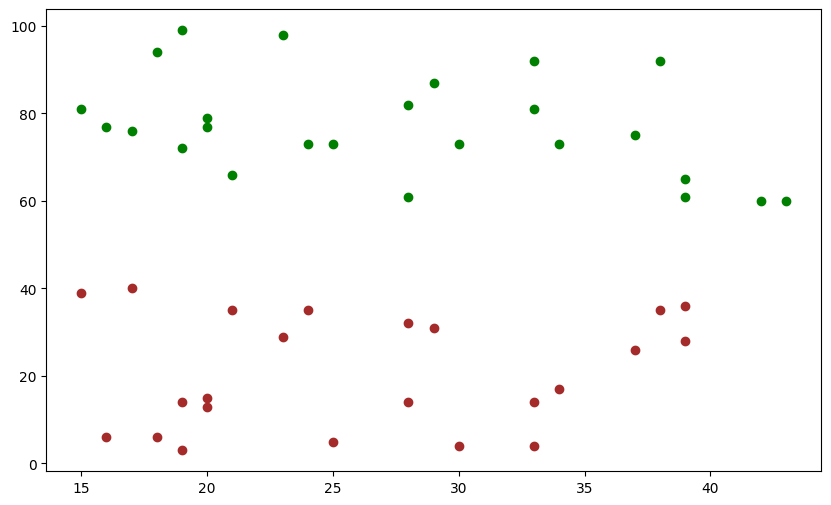

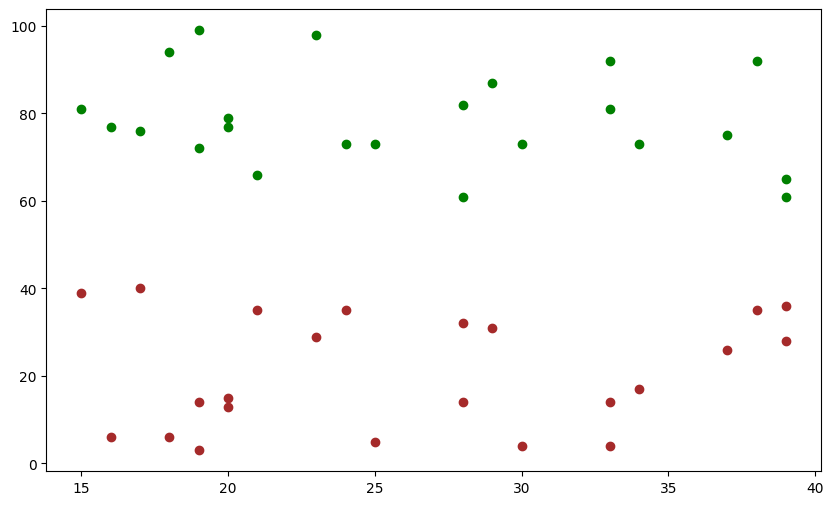

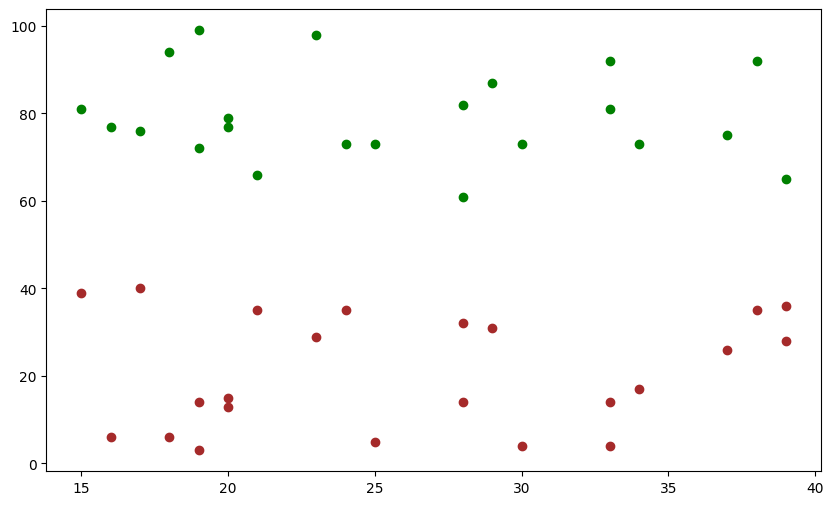

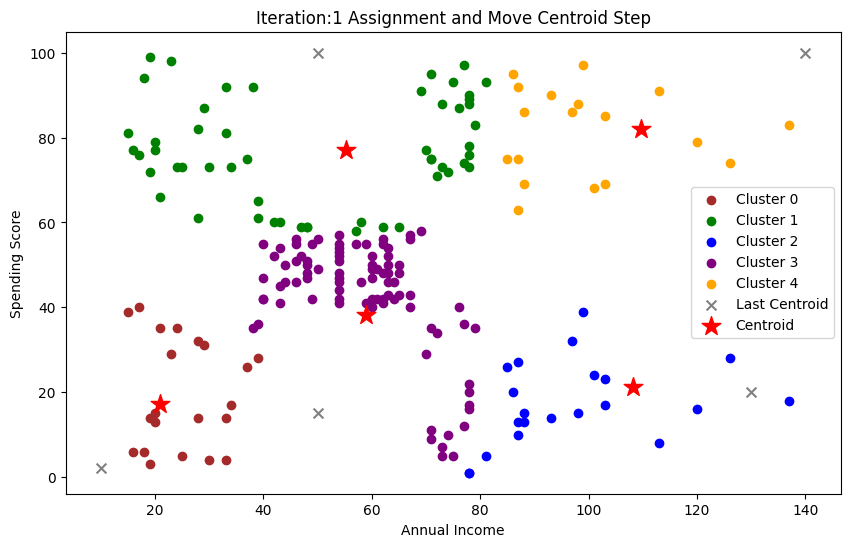

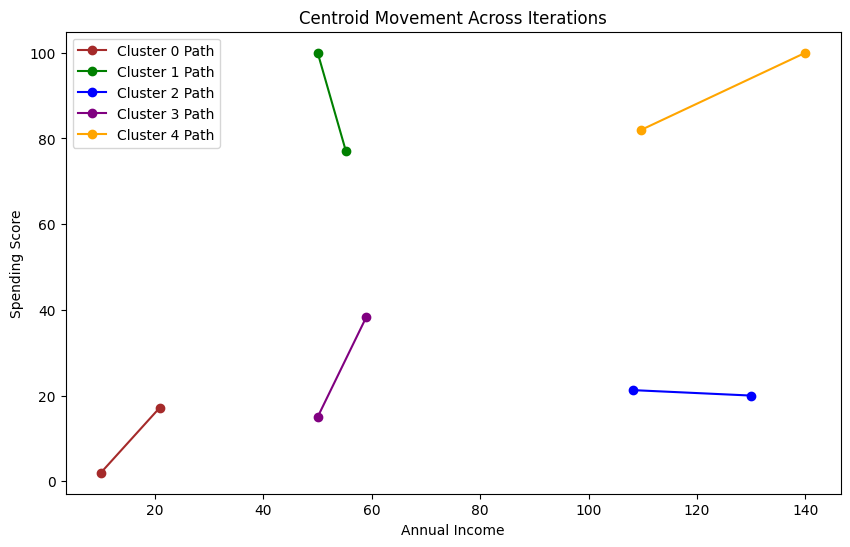

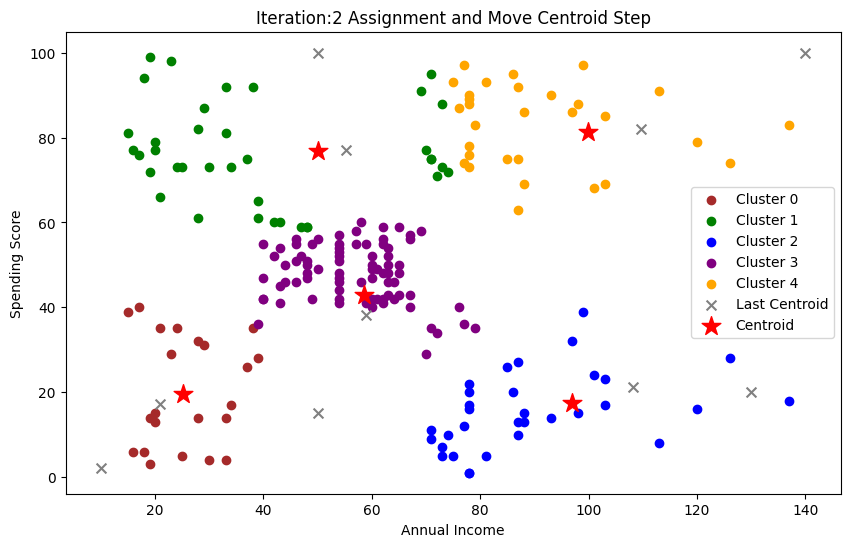

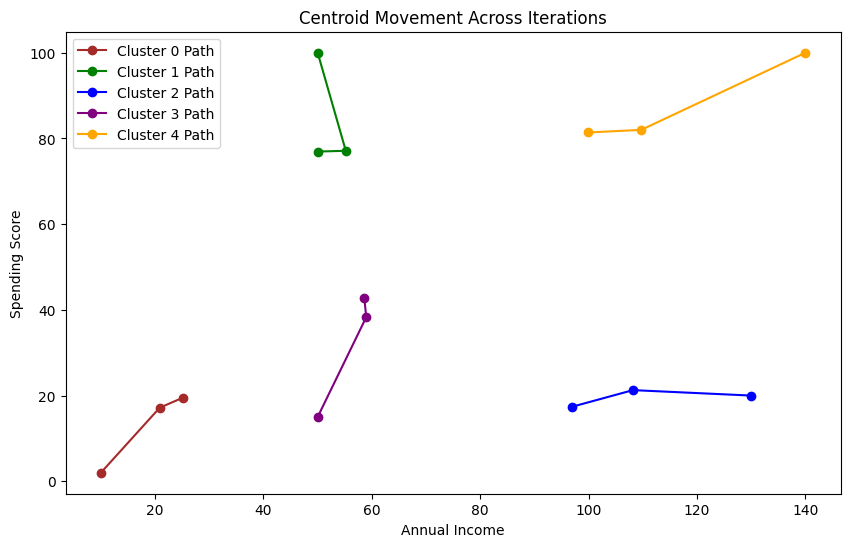

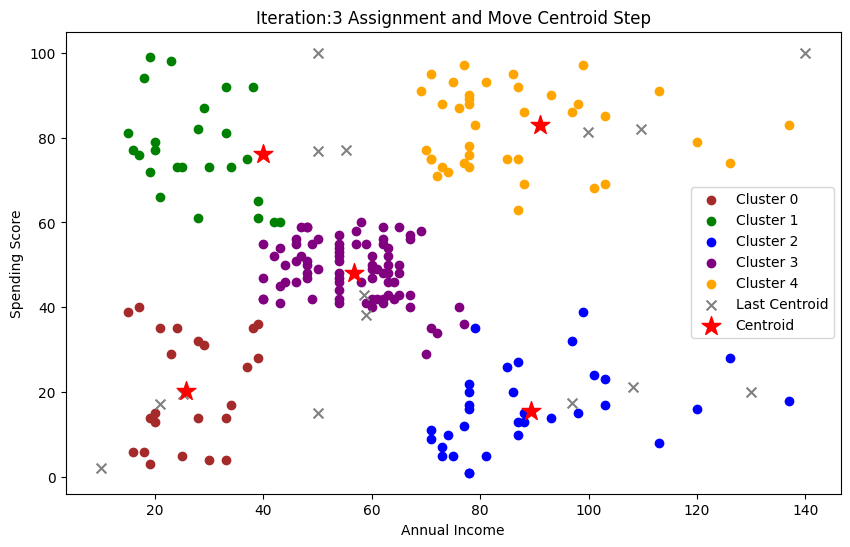

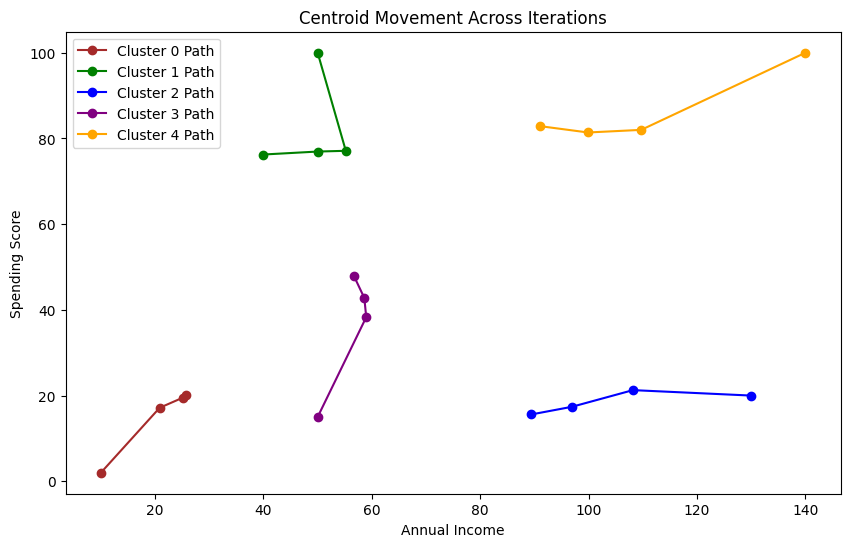

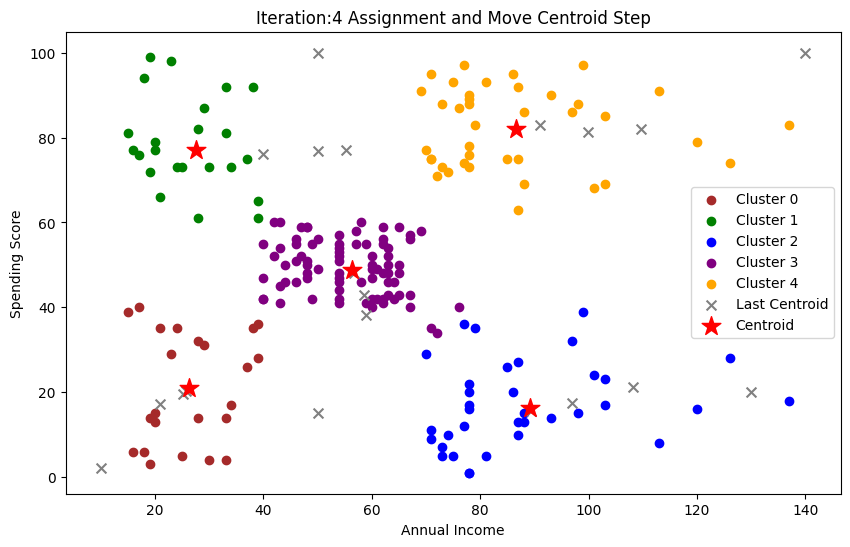

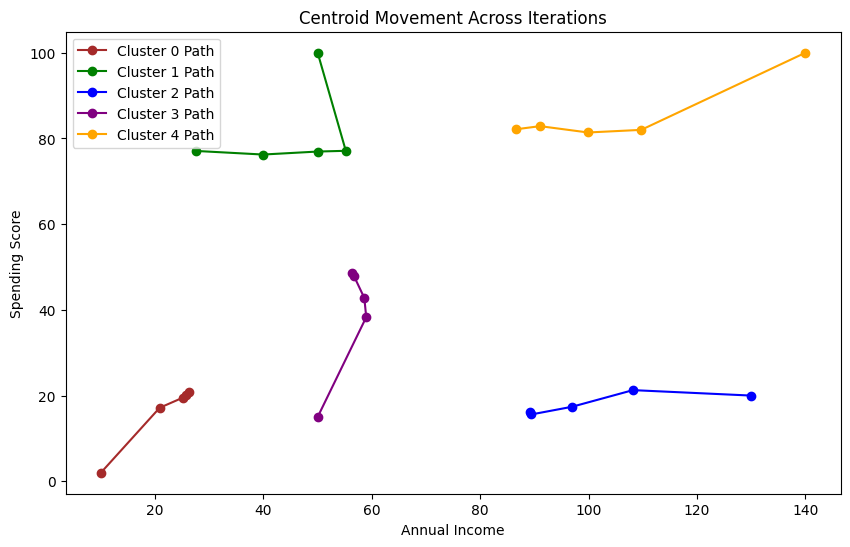

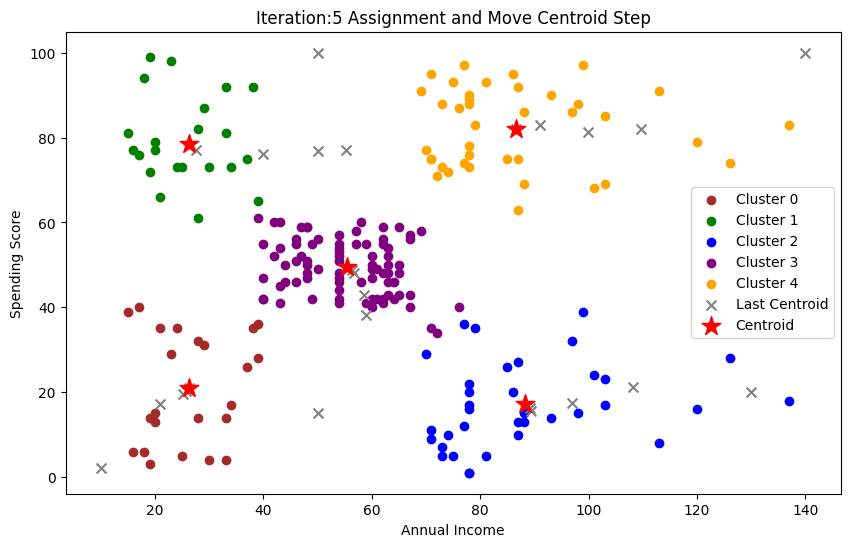

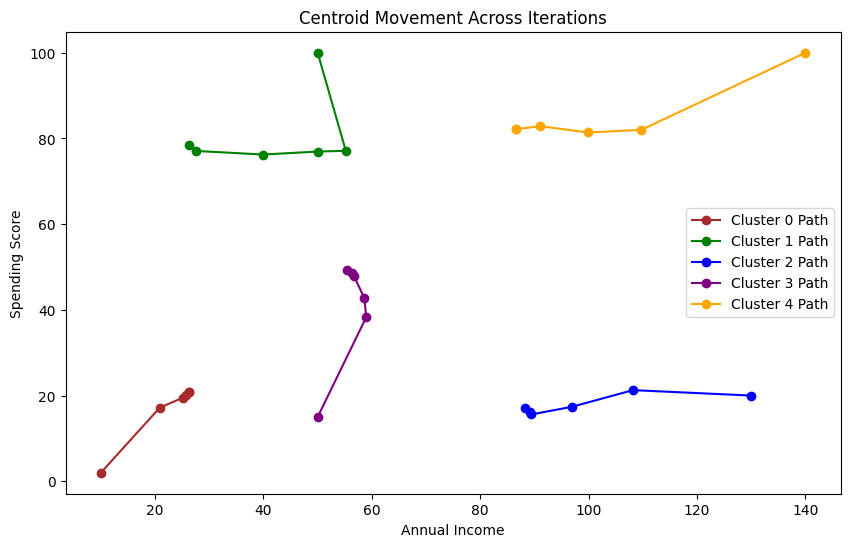

In [75]:
plt.figure(figsize=(10,6))

# Random Initialization of Centroids
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
initial_centroid = np.array([[10, 2], [50,100], [130,20], [50,15], [140,100]])

plt.scatter(initial_centroid[:,0], initial_centroid[:, 1],s = 200, c = 'red', label = 'Random Centroid', marker='*')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Random Initialization of Centroids')

# K-Means loop of assignment and move centroid steps
centroid_history = []
centroid_history = initial_centroid
#
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array

    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    #
cluster_color= {'c_0':'brown','c_1':'green','c_2':'blue','c_3':'purple','c_4':'orange'}
n_clusters = 5
for i in range(1,6):
    kmeans= KMeans(n_clusters, init= initial_centroid, n_init= 1, max_iter= i, random_state = 42)  #n_init= 1 since our init parameter is array

    # Compute cluster centers and predict cluster index for each sample
    pred = kmeans.fit_predict(X)

    plt.figure(figsize=(10,6))
    plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
    plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
    plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
    plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
    plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

    plt.scatter(centroid_history[:,0], centroid_history[:, 1],s = 50, c = 'gray', label = 'Last Centroid', marker='x')

    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 200, c = 'red', label = 'Centroid', marker='*')

    centroid_history = np.append(centroid_history, kmeans.cluster_centers_, axis=0)

    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.title('Iteration:' + str(i) + ' Assignment and Move Centroid Step')

    centroid_sets = i + 1 # Adding one for initial set of centroids
    plot_k_means_progress(centroid_history,n_clusters, centroid_sets, cluster_color)



